_<center><h1> Mall Customer Segmentation using K-Means Clustering</h1>_

_<center> <h2> Author: Muhammad Taimoor Khan </h2>_

<hr>

<h3> Importing Dependencies </h3>

In [2]:
# Importing Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

<hr>

<h3> Data Collection and Analysis </h3>

In [3]:
# loading the data from .csv file
cust_data = pd.read_csv('Mall_Customers.csv')
print("Dataset have been read!")

Dataset have been read!


In [5]:
cust_data.head() # Prints first five rows in the dataframe

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# finding the number of rows and cols
cust_data.shape

(200, 5)

In [12]:
# getting some more info on the dataset
cust_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


<h4> For the Annual Income and Spending Score Columns </h4>

In [15]:
X = cust_data.iloc[:,[3,4]].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

#### Determining The Number of Clusters

<code>WCSS --> Within Clusters Sum of Squares

In [18]:
# Finding WCSS for the different number of Clusters
wcss = []
for i in range (1,11):
    kmeans_model = KMeans(n_clusters=i, init = "k-means++", random_state=40)
    kmeans_model.fit(X)
    
    wcss.append(kmeans_model.inertia_)

C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

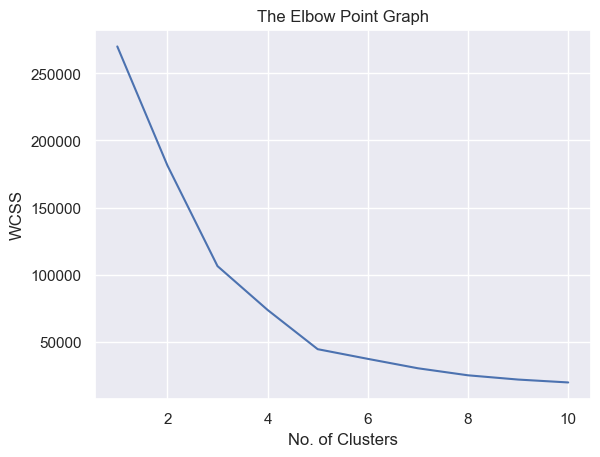

In [22]:
# Plot an elbow graph
sns.set()
plt.plot(range(1, 11), wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("No. of Clusters")
plt.ylabel("WCSS")

plt.show()

The optimum number of clusters will be <code> K --> 5

<hr>

<h3> Training K-Means Clustering Model </h3>

In [23]:
kmeans_model = KMeans(n_clusters = 5, init = "k-means++", random_state=4)

# Return a label for each datapoint based on their cluster
Y = kmeans_model.fit_predict(X)
print(Y)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


C:\Users\PMLS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


<hr>

<h3> Visualizing The Clusters </h3>

C:\Users\PMLS\AppData\Local\Temp\ipykernel_14236\3383616291.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, len(centroids)))
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14236\3383616291.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(X[Y==i,0], X[Y==i,1], s=50, c=colors[i], label=f'Cluster {i+1}')
C:\Users\PMLS\AppData\Local\Temp\ipykernel_14236\3383616291.py:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as 

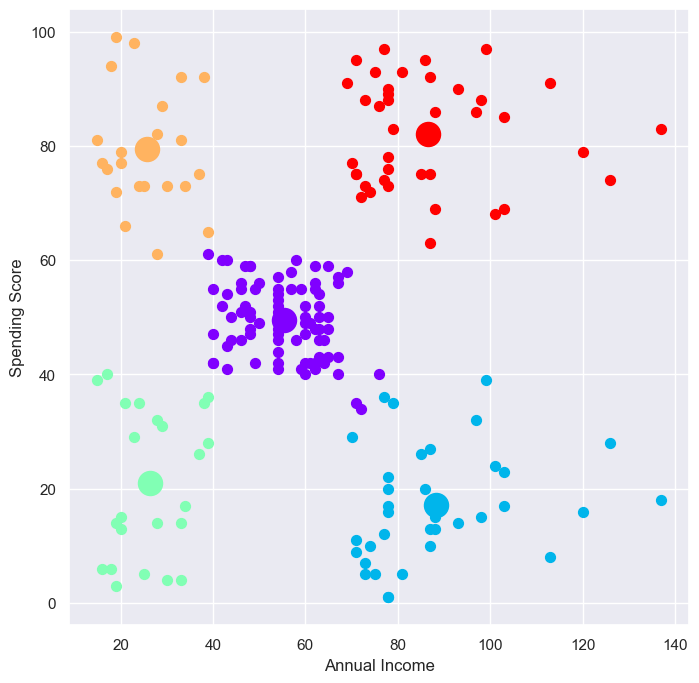

In [31]:
def plot_clusters(X, Y, centroids):
    fig, ax = plt.subplots(figsize=(8,8))

    # Generate a list of distinct colors
    colors = plt.cm.get_cmap('rainbow')(np.linspace(0, 1, len(centroids)))

    for i in range(len(centroids)):
        # Plot the data points of the current cluster
        ax.scatter(X[Y==i,0], X[Y==i,1], s=50, c=colors[i], label=f'Cluster {i+1}')
        
        # Plot the centroid of the current cluster
        ax.scatter(centroids[i,0], centroids[i,1], s=300, c=colors[i], label=f'Centroid {i+1}')
    
    # Display the legend
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.show()

# Extract the centroids and the corresponding labels
centroids = kmeans_model.cluster_centers_
Y = kmeans_model.labels_

# Plot the clusters
plot_clusters(X, Y, centroids)